In [1]:
import numpy as np
from qiskit import IBMQ, pulse
from qiskit.circuit import Parameter

IBMQ.load_account()
#provider = IBMQ.get_provider(hub='ibm-q-utokyo', group='internal', project='icepp')
provider = IBMQ.get_provider(hub='ibm-q-utokyo', group='internal', project='q-comp-training')
backend = provider.get_backend('ibm_kawasaki')

In [2]:
x_pulse = backend.defaults().instruction_schedule_map.get('x', 3).instructions[0][1].pulse
print(x_pulse)

Drag(duration=160, amp=(0.17502099440265126+0j), sigma=40, beta=0.33318404699494575, name='Xp_d3')


In [3]:
phi = Parameter('phi')
scale = Parameter('scale')
with pulse.build(backend=backend, default_alignment='sequential') as sched:
    pulse.shift_phase(phi, pulse.drive_channel(3))
    pulse.play(pulse.Drag(duration=160, amp=(0.17500520867268415 * scale), sigma=40, beta=0.3388910777805415, name='Xp_d3'), pulse.drive_channel(3), name='scaled_x')
    pulse.measure(qubits=[3], registers=[pulse.MemorySlot(0)])
    
schedules = [sched.assign_parameters({phi: p, scale: s}, inplace=False) for s in np.linspace(0.1, 1., 10) for p in np.linspace(-np.pi, np.pi, 20)]

In [4]:
#from qiskit.tools.monitor import job_monitor

#job = backend.run(schedules, shots=2048, meas_level=2)
#job_monitor(job)

job = backend.retrieve_job('6148a2abf020e88e0d6bf936')

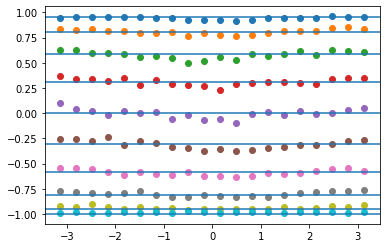

In [8]:
import matplotlib.pyplot as plt

phi_values = np.linspace(-np.pi, np.pi, 20)

counts = job.result().get_counts()
for iscale in range(10):
    y = np.empty(20, dtype=float)
    y = np.array([(c.get('0', 0) / 1024. - 1.) for c in counts[iscale * 20:(iscale + 1) * 20]])

    plt.axhline(y=np.cos((iscale + 1) / 10. * np.pi))
    plt.scatter(phi_values, y)
